In [35]:
#import the required packages
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [36]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [37]:
#Path to the train and test dataset
train_path="/content/drive/MyDrive/assignment scivers/jpeg_model/train1"
test_path="/content/drive/MyDrive/assignment scivers/jpeg_model/test1"


In [5]:
import os
import cv2

In [38]:
#resizing the images and appending it to array
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [40]:
#resizing the images and appending it to array
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
    

In [41]:
# changing names of arrays to train and test respectively
train_x=np.array(x_train)
test_x=np.array(x_test)

In [42]:
#checking the shape of array
train_x.shape,test_x.shape

((90, 224, 224, 3), (20, 224, 224, 3))

 x_train,x_test, must be divided by 255.0 for normalization.

In [43]:
#normalizing the array
train_x=train_x/255.0
test_x=test_x/255.0

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Compute the labels of the corresponding datasets using ImageDataGenerator.This is used because our images are stored in folders

In [45]:
# rescaling the images using imagedatagenarator
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 90 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [46]:
#class indices
training_set.class_indices

{'negative': 0, 'positive': 1}

In [47]:
#setting the labels as the target variable for the classes
train_y=training_set.classes

In [48]:
test_y=test_set.classes

In [49]:
train_y.shape,test_y.shape

((90,), (20,))

In [51]:
# adding preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [52]:
# not to train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [53]:
# our layers - we can add more if needed
x = Flatten()(vgg.output)

prediction = Dense(2, activation='sigmoid')(x)

In [54]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [55]:
# cost and optimization method used by model
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [56]:
#Early stopping to avoid overfitting of model
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='accuracy',mode='max',verbose=1,patience=5)



In [57]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
3/3 [==============================] - 60s 19s/step - loss: 2.0582 - accuracy: 0.4556
Epoch 2/10
3/3 [==============================] - 61s 20s/step - loss: 1.1694 - accuracy: 0.4556
Epoch 3/10
3/3 [==============================] - 61s 20s/step - loss: 0.7801 - accuracy: 0.6556
Epoch 4/10
3/3 [==============================] - 59s 19s/step - loss: 0.9035 - accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 59s 19s/step - loss: 0.7172 - accuracy: 0.5111
Epoch 6/10
3/3 [==============================] - 61s 19s/step - loss: 0.5975 - accuracy: 0.5778
Epoch 7/10
3/3 [==============================] - 61s 19s/step - loss: 0.6434 - accuracy: 0.7444
Epoch 8/10
3/3 [==============================] - 58s 19s/step - loss: 0.4724 - accuracy: 0.8333
Epoch 9/10
3/3 [==============================] - 61s 20s/step - loss: 0.4768 - accuracy: 0.8000
Epoch 10/10
3/3 [==============================] - 61s 20s/step - loss: 0.4043 - accuracy: 0.8222


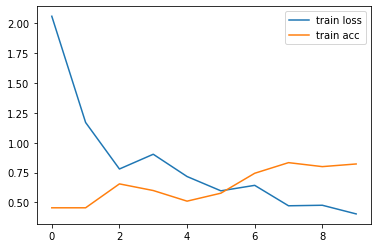

In [58]:
#plotting the loss vs accuracy graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train acc')

plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [59]:
#evaluating the model on test dataset
model.evaluate(test_x,test_y,batch_size=32)

1/1 [==============================] - 13s 13s/step - loss: 0.3511 - accuracy: 0.8500


[0.3510749936103821, 0.8500000238418579]

In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [61]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

1/1 [==============================] - 13s 13s/step


In [62]:
#accuracy Score of test data set
accuracy_score(y_pred,test_y)

0.85

In [63]:
#Classification report on the test dataset
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.70      1.00      0.82         7

    accuracy                           0.85        20
   macro avg       0.85      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20



In [64]:
confusion_matrix(y_pred,test_y)

array([[10,  3],
       [ 0,  7]])